2024-06-20 15:19:00.518506: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 15:19:03.636633: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 15:19:03.636729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 15:19:03.839476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 15:19:04.197656: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 15:19:04.214486: I tensorflow/core/platform/cpu_feature_guard.cc:1

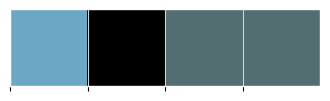

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.tsa.stattools
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, TimeDistributed, Conv1D, MaxPooling1D


from src.model_utils import feature_engineering, time_split, time_split_plot  # Importa a função feature_engineering do arquivo model_utils.py em src


# Warnings filtering.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['figure.titlesize']    = 25
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['font.size']           = 12
mpl.rcParams['axes.grid']           = True
# mpl.rcParams['figure.dpi']          = 150

import xgboost as xgb

# Palette Seting
palette = ['#6CA7C5', '#000000', '#526E70', '#526E70']
palette2 = ['#214737', '#083313']

sns.set_palette(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette))

In [2]:
df = pd.read_csv('input/train.csv')

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df.set_index('date', inplace=True)
df.sort_values(by=['date', 'store', 'item'], inplace=True)
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-01,1,2,33
2013-01-01,1,3,15
2013-01-01,1,4,10
2013-01-01,1,5,11


<Axes: xlabel='date'>

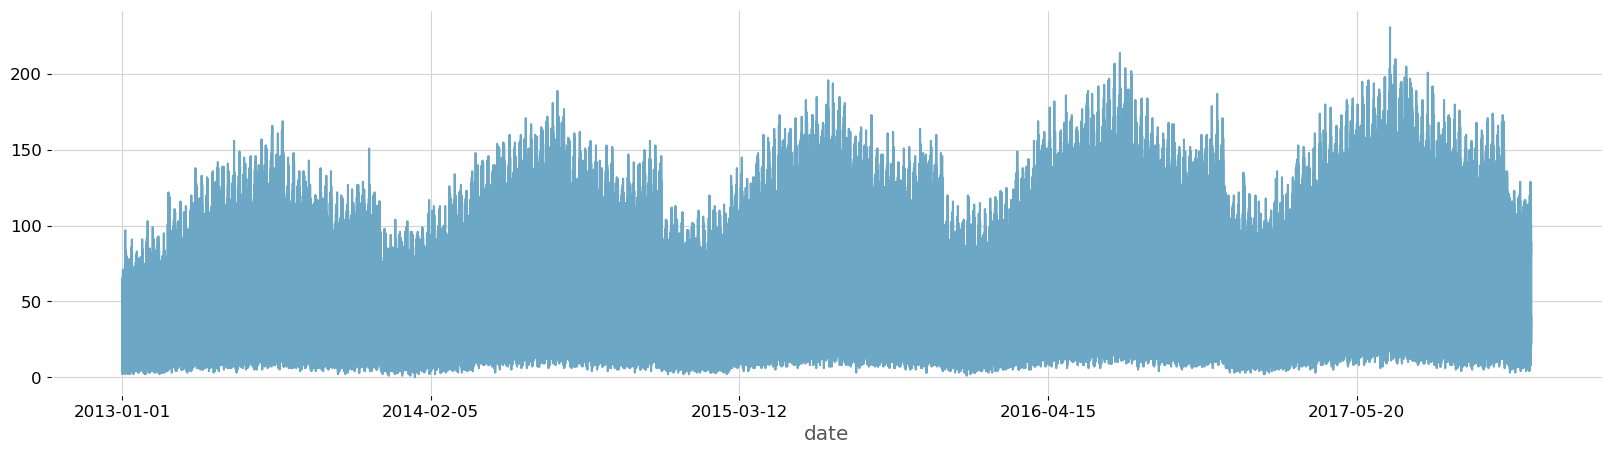

In [8]:
df['sales'].plot()